In [17]:
import pandas as pd
import numpy as np
from datetime import datetime
import plotly.express as px

In [18]:
def reduction_smooth(df: pd.DataFrame, window: int = 10):
    rolling_mean = df['Current'].ewm(alpha=0.2, adjust=False).mean()
    df_resampled = pd.DataFrame({'Time': df['Time'].iloc[::window],
                                 'Current': rolling_mean[::window],
                                 'Wavelength': df['Wavelength'].iloc[::window],
                                 "Shutter":  df['Shutter'].iloc[::window]})
    df = df.reset_index(drop=True)
    return df_resampled

In [19]:
df = pd.read_table(r"Данные\350C_1час_ширина шага 2нм_задержка 60сек_062024_134220_.txt",  decimal=',')
format_data = "%m%d%y_%H%M%S"
df = df.loc[df.Wavelength >= 300].copy(deep=True)
df["Current"] = df["Current"].astype("float")
df["Shutter"] = df["Shutter"].astype("float")
df = df.reset_index(drop=True)
df["Time"] = df.Timestamp.apply( lambda x: datetime.strptime(x, format_data))
df["Time"] = df["Time"] - df["Time"][0]
df["Time"] = df["Time"].dt.total_seconds()
df = reduction_smooth(df, window=20)
for i in range(int(df.Time[df.index[-1]])):
    pattern = np.linspace(0,1,len(df[df.Time == i]))
    df.loc[df.Time == i, "Time"] += pattern
df = df.loc[df.Wavelength >= 300][["Time", "Current", "Wavelength", "Shutter"]].copy(deep=True)
df


Time       Current  Wavelength  Shutter
0           0.0 -3.906301e-07         300      0.0
20          2.0 -3.941789e-07         300      0.0
40          4.0 -3.943773e-07         300      0.0
60          5.0 -3.842015e-07         300      1.0
80          7.0 -3.615820e-07         300      1.0
...         ...           ...         ...      ...
150380  12642.0 -3.626333e-07         498      0.0
150400  12644.0 -3.577436e-07         498      0.0
150420  12646.0 -3.664876e-07         498      0.0
150440  12648.0 -3.668409e-07         498      0.0
150460  12649.0 -3.645086e-07         498      0.0

[7524 rows x 4 columns]

In [20]:
df.Wavelength.unique()

array([300, 302, 304, 306, 308, 310, 312, 314, 316, 318, 320, 322, 324,
       326, 328, 330, 332, 334, 336, 338, 340, 342, 344, 346, 348, 350,
       352, 354, 356, 358, 360, 362, 364, 366, 368, 370, 372, 374, 376,
       378, 380, 382, 384, 386, 388, 390, 392, 394, 396, 398, 400, 402,
       404, 406, 408, 410, 412, 414, 416, 418, 420, 422, 424, 426, 428,
       430, 432, 434, 436, 438, 440, 442, 444, 446, 448, 450, 452, 454,
       456, 458, 460, 462, 464, 466, 468, 470, 472, 474, 476, 478, 480,
       482, 484, 486, 488, 490, 492, 494, 496, 498], dtype=int64)

In [21]:
len(df.Wavelength.unique())

100

In [22]:
df = df.loc[df.Wavelength <= 400][["Time", "Current", "Wavelength", "Shutter"]].copy(deep=True)
df.reset_index(drop=True)

Time       Current  Wavelength  Shutter
0        0.0 -3.906301e-07         300      0.0
1        2.0 -3.941789e-07         300      0.0
2        4.0 -3.943773e-07         300      0.0
3        5.0 -3.842015e-07         300      1.0
4        7.0 -3.615820e-07         300      1.0
...      ...           ...         ...      ...
3839  6443.0 -3.616198e-07         400      0.0
3840  6445.0 -3.597305e-07         400      0.0
3841  6447.0 -3.587933e-07         400      0.0
3842  6448.0 -3.515035e-07         400      0.0
3843  6450.0 -3.622919e-07         400      0.0

[3844 rows x 4 columns]

In [24]:
px.line(df, x="Time", y=["Current", "Shutter", "Wavelength"])

In [26]:
plot_df = df.copy()
plot_df.Current = df.Current*1e8
plot_df.Shutter = df.Shutter*100
px.line(plot_df, x="Time", y=["Current", "Shutter", "Wavelength"])

In [7]:
len(df.loc[df.Wavelength == 400])

1502

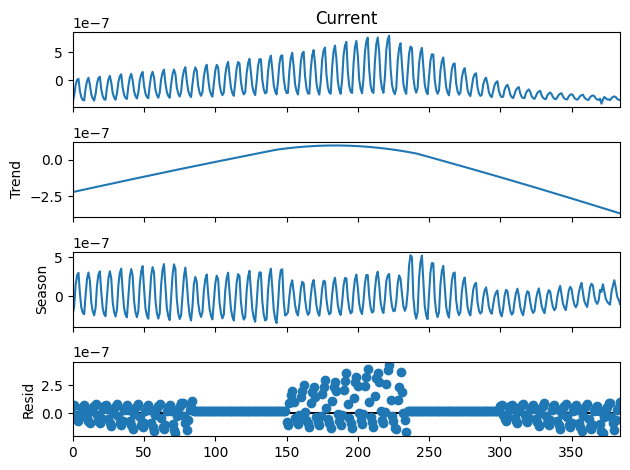

In [6]:
from statsmodels.tsa.seasonal import STL
df = reduction_smooth(df)
stl = STL(df.Current.reset_index(drop=True), period=150)
res = stl.fit()
fig = res.plot()

In [19]:
px.line(res.seasonal)

In [ ]:
px.line(res.trend)

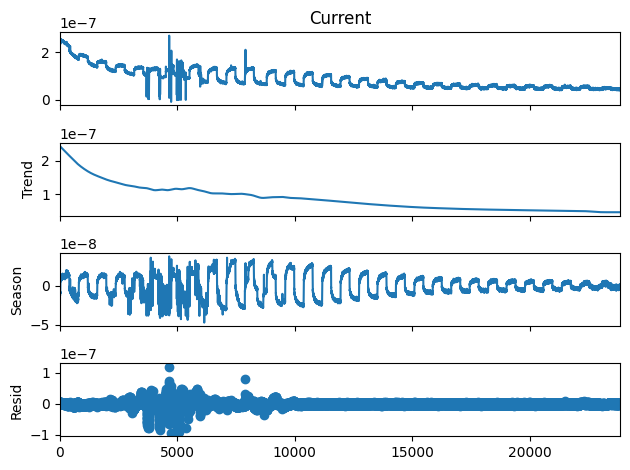

In [ ]:
df = pd.read_table(r"Данные\DCV_042224_160805_.txt",  decimal=',')
format_data = "%m%d%y_%H%M%S"

df["Time"] = df.Timestamp.apply( lambda x: datetime.strptime(x, format_data))
df["Time"] = df["Time"] - df["Time"][0]
df["Time"] = df["Time"].dt.total_seconds()
for i in range(int(df.Time[df.index[-1]])):
    pattern = np.linspace(0,1,len(df[df.Time == i]))
    df.loc[df.Time == i, "Time"] += pattern
df = df.loc[df.Wavelength >= 300][["Time", "Current", "Wavelength", "Shutter"]].copy(deep=True)
stl = STL(df.Current.reset_index(drop=True), period=785)
res = stl.fit()
fig = res.plot()

In [ ]:
px.line(res.resid)

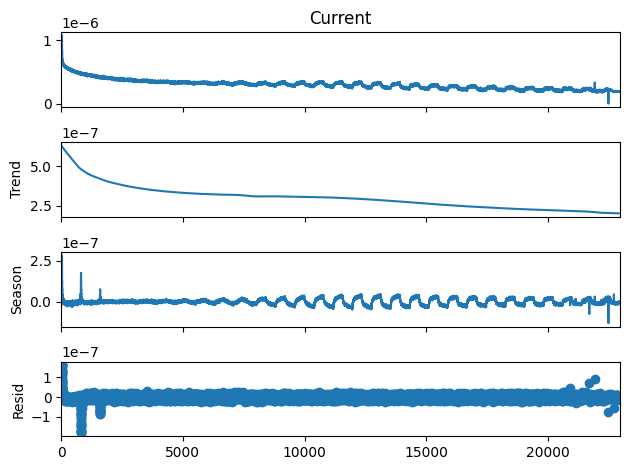

In [ ]:
df = pd.read_table(r"Данные\DCV_042224_172542_.txt",  decimal=',')
format_data = "%m%d%y_%H%M%S"

df["Time"] = df.Timestamp.apply( lambda x: datetime.strptime(x, format_data))
df["Time"] = df["Time"] - df["Time"][0]
df["Time"] = df["Time"].dt.total_seconds()
for i in range(int(df.Time[df.index[-1]])):
    pattern = np.linspace(0,1,len(df[df.Time == i]))
    df.loc[df.Time == i, "Time"] += pattern
df = df.loc[df.Wavelength >= 310][["Time", "Current", "Wavelength", "Shutter"]].copy(deep=True)
stl = STL(df.Current.reset_index(drop=True), period=785)
res = stl.fit()
fig = res.plot()

In [ ]:
px.line(res.seasonal)